0. The best clustering method and hyperparameters for this data.
2. Perform a train-test split using random_state = 100.
3. Plot the silhouette scores for k-means clustering using k ranging from 2 to  10. Use the plot to determine a value of k to use for kmeans clustering.
4. Now use the value of k with the highest silhouette score found in the previous step to perform kmeans clustering on the test set with random_state=100, and print out the silhouette score.
5. Perform mean-shift clustering and print out its silhouette score on the test set.
6. Perform k-modes clustering and print out its silhouette score on the test set.

In [21]:
import pandas as pd

df = pd.read_csv('data_science/customer_offers.csv').set_index('customer_name')

In [22]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [12]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split(df, random_state = 100)

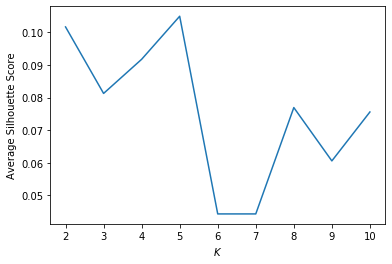

In [13]:
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_test)
    
    silhouette_avg = metrics.silhouette_score(X_test, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)
    
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

In [17]:
model = cluster.KMeans(n_clusters=5, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.10492730556517223


In [18]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1, n_samples=500)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


In [23]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4)
km.fit(X_train)

kmode_labels = km.predict(X_test)

kmode_silhouette = metrics.silhouette_score(X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501
